## 1. Import Libraries
This block imports essential libraries for data manipulation (pandas, numpy), sentiment analysis (TextBlob), statistical correlation (scipy.stats), and visualization (matplotlib, seaborn).

In [13]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load News and Stock Data
Loads the processed news sentiment data and Apple's historical stock data from CSV files. Handles file errors and ensures the required files are present.

In [14]:
try:
    # Load the news csv file
    news_df = pd.read_csv('../../data/processed_analyst_ratings.csv')
    # Load Historical Data
    stock_df = pd.read_csv('../../data/yfinance_data/GOOG_historical_data.csv')
except FileNotFoundError:
    print("File not found. Please ensure the path is correct and the file exists.")
    exit(1)
except Exception as e:
    print(f"An error occurred while reading the parquet file: {e}")
    exit(1)

## 3. Convert Date Columns to Datetime
Converts the date columns in both DataFrames to datetime format for accurate merging and time-based analysis.

In [15]:
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', utc=True)
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='mixed', utc=True)

## 4. Merge News and Stock Data
Merges the news and stock DataFrames on the date columns to align sentiment scores with corresponding stock prices.

In [16]:
merged_df = pd.merge(news_df[news_df['stock'] == 'GOOG'], 
                     stock_df, left_on='date', right_on='Date', how='left')

## 5. Inspect Merged Data
Displays the shape and a sample of the merged DataFrame to verify the merge and inspect the data.

In [18]:
print(merged_df.shape)
merged_df.head(5)

(1158, 15)


,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,"Day After Selloff, Earnings, Trade News Seem T...",https://www.benzinga.com/news/earnings/18/11/1...,JJ Kinahan,2018-11-13 00:00:00+00:00,GOOG,0.000000,2018-11-13 00:00:00+00:00,52.164501,52.830250,51.557499,51.802502,51.743618,30274000,0.0,0.0
1,Startup Point Of Sale Operating System Poynt R...,https://www.benzinga.com/fintech/18/11/1268071...,Spencer White,2018-11-13 00:00:00+00:00,GOOG,0.000000,2018-11-13 00:00:00+00:00,52.164501,52.830250,51.557499,51.802502,51.743618,30274000,0.0,0.0
2,"Moderate Inflation, Positive Retail Earnings O...",https://www.benzinga.com/news/earnings/18/11/1...,JJ Kinahan,2018-11-14 00:00:00+00:00,GOOG,0.113636,2018-11-14 00:00:00+00:00,52.500000,52.728199,51.549999,52.182999,52.123684,31318000,0.0,0.0
3,UPDATE: JANA Partners 13F Shows Fund Liquidate...,https://www.benzinga.com/news/18/11/12696718/u...,Benzinga Newsdesk,2018-11-14 00:00:00+00:00,GOOG,0.000000,2018-11-14 00:00:00+00:00,52.500000,52.728199,51.549999,52.182999,52.123684,31318000,0.0,0.0
4,Loup's Munster On Alphabet/Google Notes Short-...,https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2018-11-15 00:00:00+00:00,GOOG,0.436111,2018-11-15 00:00:00+00:00,52.235500,53.592499,51.589001,53.235500,53.174988,36722000,0.0,0.0


## 6. Handle Missing Values
Checks for missing values in the merged DataFrame, drops any rows with missing data, and displays the new shape.

In [19]:
# Check for missing values
print(merged_df['date'].isnull().sum())
merged_df.dropna(inplace=True)  # Drop missing values if necessary
merged_df.shape

0


(1158, 15)

## 7. Calculate Daily Returns
Calculates the daily stock return as the percentage change in the closing price and adds it as a new column.

In [20]:
merged_df['daily_return'] = merged_df['Close'].pct_change()  # Calculate daily returns
merged_df.head()

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,"Day After Selloff, Earnings, Trade News Seem T...",https://www.benzinga.com/news/earnings/18/11/1...,JJ Kinahan,2018-11-13 00:00:00+00:00,GOOG,0.000000,2018-11-13 00:00:00+00:00,52.164501,52.830250,51.557499,51.802502,51.743618,30274000,0.0,0.0,NaN
1,Startup Point Of Sale Operating System Poynt R...,https://www.benzinga.com/fintech/18/11/1268071...,Spencer White,2018-11-13 00:00:00+00:00,GOOG,0.000000,2018-11-13 00:00:00+00:00,52.164501,52.830250,51.557499,51.802502,51.743618,30274000,0.0,0.0,0.000000
2,"Moderate Inflation, Positive Retail Earnings O...",https://www.benzinga.com/news/earnings/18/11/1...,JJ Kinahan,2018-11-14 00:00:00+00:00,GOOG,0.113636,2018-11-14 00:00:00+00:00,52.500000,52.728199,51.549999,52.182999,52.123684,31318000,0.0,0.0,0.007345
3,UPDATE: JANA Partners 13F Shows Fund Liquidate...,https://www.benzinga.com/news/18/11/12696718/u...,Benzinga Newsdesk,2018-11-14 00:00:00+00:00,GOOG,0.000000,2018-11-14 00:00:00+00:00,52.500000,52.728199,51.549999,52.182999,52.123684,31318000,0.0,0.0,0.000000
4,Loup's Munster On Alphabet/Google Notes Short-...,https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2018-11-15 00:00:00+00:00,GOOG,0.436111,2018-11-15 00:00:00+00:00,52.235500,53.592499,51.589001,53.235500,53.174988,36722000,0.0,0.0,0.020169


## 8. Pearson Correlation Calculation
Drops rows with missing sentiment or daily return values, then calculates and prints the Pearson correlation coefficient and p-value to assess linear correlation.

In [21]:
# Drop missing values before correlation calculation
valid_data = merged_df.dropna(subset=['sentiment', 'daily_return'])

# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")


Pearson correlation: 0.018067147467851798, p-value: 0.5392586229430492


## 9. Spearman Correlation Calculation
Calculates and prints the Spearman rank correlation coefficient and p-value to assess monotonic relationships.

In [22]:
# Spearman correlation (monotonic relationship, non-parametric)
spearman_corr, spearman_p = spearmanr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")


Spearman correlation: -0.036633636064785355, p-value: 0.21307541334476324


## 10. Kendall Correlation Calculation
Calculates and prints the Kendall tau correlation coefficient and p-value to assess ordinal associations.

In [23]:
# Kendall correlation (ordinal association, non-parametric)
kendall_corr, kendall_p = kendalltau(valid_data['sentiment'], valid_data['daily_return'])
print(f"Kendall correlation: {kendall_corr}, p-value: {kendall_p}")

Kendall correlation: -0.030814546768373054, p-value: 0.2095697767923813


The results show the following correlation values between news sentiment and daily stock return for GOOG:

- **Pearson correlation:** 0.01806 (p-value: 0.5392)
- **Spearman correlation:** -0.03663 (p-value: 0.21307)
- **Kendall correlation:** -0.03081 (p-value: 0.20956)

**Interpretation:**

All three correlation coefficients are extremely close to zero, indicating almost no relationship between news sentiment and daily stock return in the dataset.
The p-values are much greater than 0.05, so these correlations are not statistically significant.

## 11. Scatter Plot of Sentiment vs. Daily Return
Creates a scatter plot to visualize the relationship between news sentiment scores and daily stock returns.

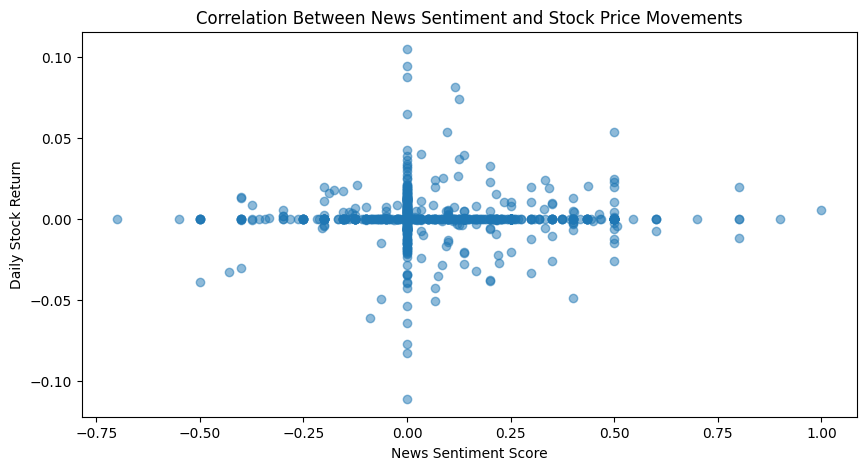

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(valid_data['sentiment'], valid_data['daily_return'], alpha=0.5)
plt.xlabel('News Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.title('Correlation Between News Sentiment and Stock Price Movements')
plt.show()

## 12. Correlation Heatmap
Selects relevant numeric columns, computes the correlation matrix, and visualizes it as a heatmap to show the strength and direction of relationships between variables.

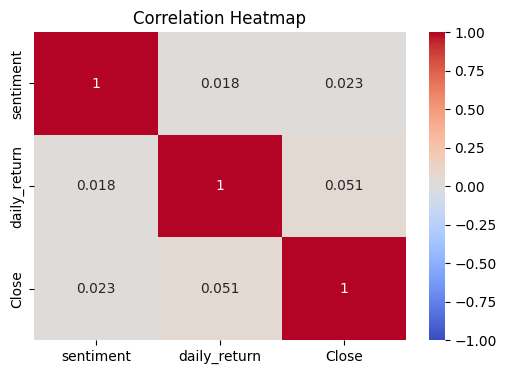

In [25]:
# Select relevant numeric columns for correlation
corr_data = valid_data[['sentiment', 'daily_return', 'Close']]

# Compute correlation matrix
corr_matrix = corr_data.corr(method='pearson')  # You can use 'spearman' or 'kendall' as well

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()